In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Name : 게임의 이름입니다.<br>
Platform : 게임이 지원되는 플랫폼의 이름입니다.<br>
Year : 게임이 출시된 연도입니다.<br>
Genre : 게임의 장르입니다.<br>
Publisher : 게임을 배급한 회사입니다.<br>
NA_Sales : 북미지역에서의 수익입니다.<br>
EU_Sales : 유럽지역에서의 수익입니다.<br>
JP_Sales : 일본지역에서의 수익입니다.<br>
Other_Sales : 기타지역에서의 수익입니다.

In [2]:
game = pd.read_csv('/content/vgames2.csv')
game

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [3]:
# 필요 없는 Columns(열) 삭제

game.drop('Unnamed: 0', axis = 1, inplace = True)

In [4]:
game

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [5]:
# 연도의 데이터가 정수가 아닌 실수형으로 지정되어 있는 것을 확인.

game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [6]:
# 입력하지 않는 빈 데이터의 개수 확인.

game.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [7]:
# 작업 공간을 game_new 로 옮긴다.

game_new = game.copy()

In [8]:
# 년도, 장르, 베포사가 없는 columns 삭제
# 베포사도 마지막에 데이터 분석 시 사용할 것이기 때문에 빈 값 삭제 하지.

game_new = game_new.dropna()
game_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  float64
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  object 
 6   EU_Sales     16241 non-null  object 
 7   JP_Sales     16241 non-null  object 
 8   Other_Sales  16241 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.2+ MB


In [18]:
# 년도를 float에서 int로 변경

game_new['Year'] = game_new['Year'].astype(int)
game_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         16241 non-null  object
 1   Platform     16241 non-null  object
 2   Year         16241 non-null  int64 
 3   Genre        16241 non-null  object
 4   Publisher    16241 non-null  object
 5   NA_Sales     16241 non-null  object
 6   EU_Sales     16241 non-null  object
 7   JP_Sales     16241 non-null  object
 8   Other_Sales  16241 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.2+ MB


In [34]:
game_new.sample(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
8497,Power Pro Success Legends,PSP,2010,Sports,Konami Digital Entertainment,0,0,0.06,0
13870,Wedding Planner: Dream Weddings Guaranteed,DS,2010,Simulation,DTP Entertainment,0M,0.01,0,0
4234,NHL 2K8,X360,2007,Sports,Take-Two Interactive,0.11,0.01,0,0.01
3537,San Francisco Rush 2049,N64,2000,Racing,Midway Games,0.16,0.04,0,0
9905,Etrian Odyssey IV: Legends of the Titans,3DS,2012,Role-Playing,Atlus,0.12,0.05,0.2,10K
11907,Madden NFL 25,PS3,2013,Sports,Electronic Arts,1.59,0.03,0,0.15
13956,Backyard NBA Basketball,DS,2007,Sports,Atari,0.07,0,0,0.01
3704,Naruto Shippuden: Ultimate Ninja Storm 3,PS3,2013,Fighting,Namco Bandai Games,0.32,0.33,0.15,0.15
7415,Spider-Man: Web of Shadows,Wii,2008,Action,Activision,0.22,0.01,0,0.02
8408,Instant Brain,X360,2011,Adventure,Cave,0,0,0.01,0


In [35]:
# 기준을 K(킬로)가 아닌 M(메가)으로 잡음

def transf(data):
  trnas_word = data
  if 'K' in trnas_word:
    trnas_word.replace('K', '')
    trnas_word = float(trnas_word.replace('K', ''))
    return trnas_word / 1000
  elif 'M' in trnas_word:
    trnas_word = trnas_word.replace('M', '')
    return float(trnas_word)
  else:
    return float(trnas_word)

In [36]:
game_new['NA_Sales'] = game_new.NA_Sales.apply(transf)
game_new['EU_Sales'] = game_new.EU_Sales.apply(transf)
game_new['JP_Sales'] = game_new.JP_Sales.apply(transf)
game_new['Other_Sales'] = game_new.Other_Sales.apply(transf)

In [37]:
game_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  int64  
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  float64
 6   EU_Sales     16241 non-null  float64
 7   JP_Sales     16241 non-null  float64
 8   Other_Sales  16241 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.2+ MB


In [38]:
game_new.sample(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
14756,Super Robot Taisen OG: Original Generations,PS2,2007,Strategy,Banpresto,0.00,0.00,0.44,0.00
15997,Wrestle Kingdom,PS2,2006,Fighting,Yuke's,0.00,0.00,0.03,0.00
7971,Grand Ages: Medieval,PS4,2015,Strategy,Kalypso Media,0.00,0.05,0.01,0.01
7648,Trick x Logic: Season 2,PSP,2010,Adventure,Sony Computer Entertainment,0.00,0.00,0.04,0.00
8624,Spy Hunter,PS2,2001,Racing,Midway Games,1.13,0.32,0.00,0.22


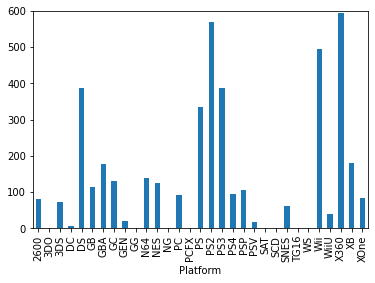

<Figure size 1440x1080 with 0 Axes>

In [39]:
# 북미지역 플렛폼별 판매량의 합계
# 판매량을 지역별로 비교하기 위해 y축을 600으로 모두 고정

NA_Platform = game_new.groupby("Platform")['NA_Sales'].sum()


NA_Platform.plot.bar(x='NA_Paltform', y='value')
plt.ylim(0,600)
plt.figure(figsize=(20,15))

plt.show()

# 결과

북미지역에서는 PS~PS4(Play Station), X360(Xbox), wii등 콘솔게임이 주를 이루고 있다.

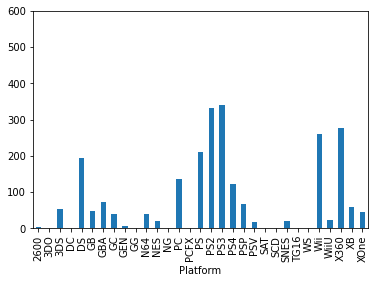

<Figure size 1440x1080 with 0 Axes>

In [40]:
# 유럽지역 플렛폼별 판매량의 합계

EU_Platform = game_new.groupby("Platform")['EU_Sales'].sum()


EU_Platform.plot.bar(x='EU_Paltform', y='value')
plt.ylim(0,600)
plt.figure(figsize=(20,15))

plt.show()

# 결과

유럽지역에서도 북미지역과 비슷하게 PS(Play Station), X360(Xbox360), wii를 플렛폼으로 사용하는 게임들이 높은 판매량을 보여준다.

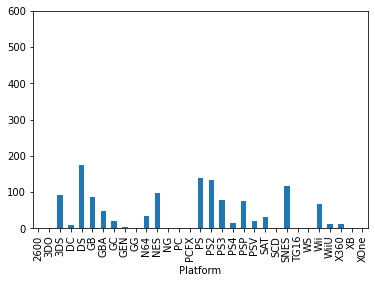

<Figure size 1440x1080 with 0 Axes>

In [41]:
# 일본지역 플렛폼별 판매량의 합계

JP_Platform = game_new.groupby("Platform")['JP_Sales'].sum()


JP_Platform.plot.bar(x='JP_Paltform', y='value')
plt.ylim(0,600)
plt.figure(figsize=(20,15))

plt.show()

# 결과

일본은 조금 다르다. 닌텐도DS가 1등을 차지하고 그 다음이 PS 시리즈이다. 북미와 유럽에서 강세를 보였던 Xbox 플렛폼은 일본에서는 수익이 낮다는 것을 확인했다.

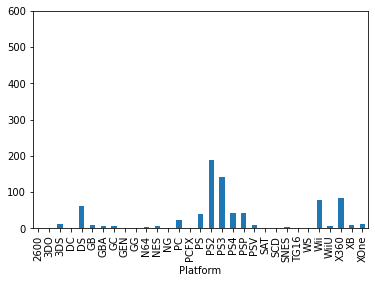

<Figure size 2160x1440 with 0 Axes>

In [42]:
# 그 외 지역 플렛폼별 판매량의 합계

Other_Platform = game_new.groupby("Platform")['Other_Sales'].sum()


Other_Platform.plot.bar(x='Other_Paltform', y='value')
plt.ylim(0,600)
plt.figure(figsize=(30,20))

plt.show()

# 결과

그 외의 지역에서는 PS 시리즈가 1등이다. Xbox와 wii 플렛폼도 판매량이 좋긴하지만 플레이스테이션 플렛폼이 압도적이다.

# 플렛폼에 대한 결과분석

1. JP지역 제외, 북미, 유럽, 그외 지역에서 모두 플레이스테이션과 엑스박스가 시장을 쥐고 있다.
2. JP 지역에서는만 닌텐도DS가 1등을 차지하고 있다.
3. 결론적으로 플레이스테이션과 엑스박스 양자구도

# 플렛폼에 대한 추가자료
# (넓고 얕은 플렛폼 Play Station VS 좁고 깊은 플렛폼 Xbox) 서로 반대로 가는 중?

게이머들 사이에서도 엑스박스와 플레이스테이션은 당연코 큰 고민이자 화제거리이다. 둘 다 산다면 고민할 필요도 없겠지만 우리 지갑 형편은 허락하지 않는다. 스펙적으로는 두 제품 모두 비슷하다. 과거엔 다양한 게임을 즐기려면 플레이스테이션, 특정 게임을 즐기려면 엑스박스란 말이 있었다. 하지만 요즘은 서로 반대로 가고 있다. 오히려 엑스박스에선 구독형 서비스를 접목시켜 매월 만 원이 조금 넘는 금액으로 100여 개의 게임을 자유롭게 즐길 수 있도록 하였고 플레이스테이션에서는 독점형 게임(마블, 갓오브워 등)을 더 견고히 다지는 방향으로 가고 있다. 서로의 약점을 서로의 강점에서 찾으려는 노력을 하고있는 듯 하다.

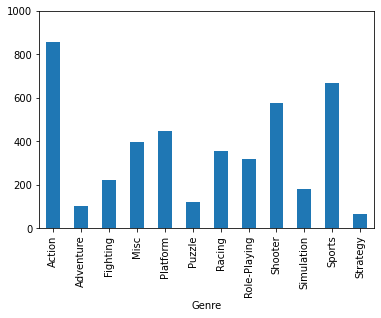

<Figure size 1440x1080 with 0 Axes>

In [43]:
# 북미지역 장르별 판매량의 합계
# 얼마나 판매되었는지 지역별로 비교하기위해 y축을 1000으로 모두 고정.

NA_game = game_new.groupby("Genre")['NA_Sales'].sum()


NA_game.plot.bar(x='NA_Genre', y='value')
plt.ylim(0,1000)
plt.figure(figsize=(20,15))
plt.show()

#결과

북미 지역에서는 Action이 1등, Sports가 2등, Shooter가 3등이다.

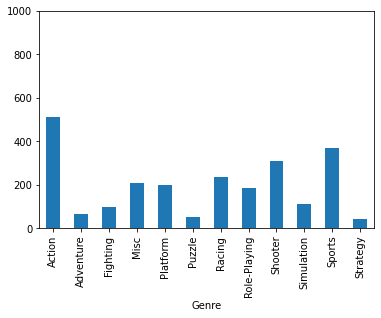

<Figure size 1440x1080 with 0 Axes>

In [44]:
# 유럽지역 장르별 판매량의 합계

EU_game = game_new.groupby("Genre")['EU_Sales'].sum()


EU_game.plot.bar(x='EU_Genre', y='value')
plt.ylim(0,1000)
plt.figure(figsize=(20,15))
plt.show()

#결과

유럽 지역에서는 Action이 1등, Sports가 2등, Shooter이 3등이다.

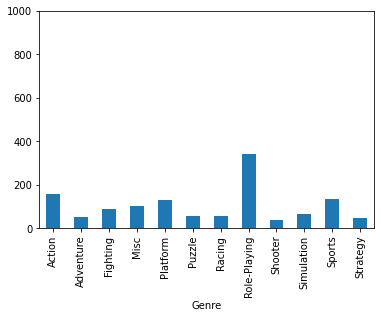

<Figure size 1440x1080 with 0 Axes>

In [45]:
# 일본지역 장르별 판매량의 합계

JP_game = game_new.groupby("Genre")['JP_Sales'].sum()


JP_game.plot.bar(x='JP_Genre', y='value')
plt.ylim(0,1000)
plt.figure(figsize=(20,15))
plt.show()

#결과

일본 지역에서만 특이하게 Role-Playing이 1등, Action이 2등, Sports가 3등이다.

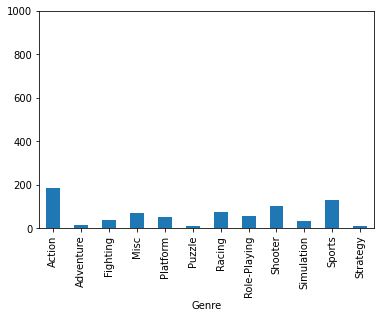

<Figure size 1440x1080 with 0 Axes>

In [48]:
# 그 외 지역 장르별 판매량의 합계

Other_game = game_new.groupby("Genre")['Other_Sales'].sum()


Other_game.plot.bar(x='Other_Genre', y='value')
plt.ylim(0,1000)
plt.figure(figsize=(20,15))
plt.show()

#결과

그 외 지역에서는 Action이 1등, Sports가 2등, Shooter가 3등이다.

In [47]:
# 장르별 지역의 판매량 총합을 보여주는 표

Sales_game = pd.DataFrame(NA_game)
Sales_game = pd.concat([Sales_game, EU_game, JP_game, Other_game], axis = 1)
Sales_game

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,858.75,513.64,156.60,183.99
Adventure,101.79,63.66,51.87,16.70
Fighting,220.35,99.90,87.14,36.15
Misc,394.73,208.15,104.18,72.64
Platform,445.38,200.63,130.53,51.45
Puzzle,121.58,50.47,56.24,12.44
Racing,354.70,235.02,56.32,76.51
Role-Playing,318.76,183.09,342.93,56.73
Shooter,574.48,310.23,38.18,101.86


지역별로 선호하는 게임이 왜 다를까?

  - 실제로 페이스북의 Games Marketing Insights for 2022에서 조사한 미국에서 가장 많은 다운로드 수를 보이는 장르도 액션장르 게임이다. 하지만 일본만이 RPG에 흥미를 보인다. 그 이유를 Research한 결과, JRPG가 일본 내에선 매우 강점을 가진 장르인 것을 파악했고 우리가 잘 알고 있는 게임 중 파이널 판타지 시리즈, 포켓몬스터, 용과 같이, 마리오시리즈 등 플레이스테이션 쪽 콘솔에서도 강점을 보인다. PC의 환경과는 다르게 콘솔로 게임을 즐길 때 느끼는 몰입감과 조작감이 다르기 때문에 콘솔환경에 맞는 Action이나 Shooter, Racing 게임의 장르들이 더 판매량이 높다고 파악했다.

# 최신 트렌드에 따른 분석

트렌드를 찾기 위한 연도의 기준은 2007년으로 잡았다. 그 이유는 통계량을 보았을 때 50% 값이 2007이기 때문이다.<br>
가장 높은 수익을 보이는 Action과 Sports, Shooter, RPG를 기준으로 진행함.

In [49]:
# 연도의 통계 확인

game_new['Year'].describe()

count    16241.000000
mean      1994.178437
std        155.484265
min          0.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

출시연도가 0년인 경우는 없으므로 데이터를 정제해야한다.

In [50]:
game_new['Year'].unique()

array([2008, 2009, 2010, 2005, 2011, 2007, 2001, 2003, 2006, 2014, 2015,
       2002, 1997, 2013, 1996, 2004, 2000, 1984, 1998, 2016, 1985, 1999,
          9,   97, 1995, 1993, 2012, 1987, 1982,   11, 1994, 1990,   15,
       1992, 1991, 1983, 1988, 1981,    3, 1989,   96,    6,    8, 1986,
          1,    5,    4,   10,   98,    7,   16,   86,   14,   95, 2017,
       1980, 2020,    2,   13,    0,   12,   94])

값들 중 10의 자리수, 1의 자리수인 값들이 존재해 20을 안 넘는다면 2000을<br>20이 넘는 10의 자리수라면 1900을 더해줘 연도데이터를 정제해주고 다시 통계를 확인했다.

In [51]:
game_new.loc[game_new['Year'] <= 20, 'Year'] += 2000

In [52]:
game_new['Year'].unique()

array([2008, 2009, 2010, 2005, 2011, 2007, 2001, 2003, 2006, 2014, 2015,
       2002, 1997, 2013, 1996, 2004, 2000, 1984, 1998, 2016, 1985, 1999,
         97, 1995, 1993, 2012, 1987, 1982, 1994, 1990, 1992, 1991, 1983,
       1988, 1981, 1989,   96, 1986,   98,   86,   95, 2017, 1980, 2020,
         94])

In [53]:
game_new.loc[game_new['Year'] <=100, 'Year'] += 1900

In [54]:
game_new['Year'].unique()

array([2008, 2009, 2010, 2005, 2011, 2007, 2001, 2003, 2006, 2014, 2015,
       2002, 1997, 2013, 1996, 2004, 2000, 1984, 1998, 2016, 1985, 1999,
       1995, 1993, 2012, 1987, 1982, 1994, 1990, 1992, 1991, 1983, 1988,
       1981, 1989, 1986, 2017, 1980, 2020])

In [55]:
game_new['Year'].describe()

count    16241.000000
mean      2006.406748
std          5.832087
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

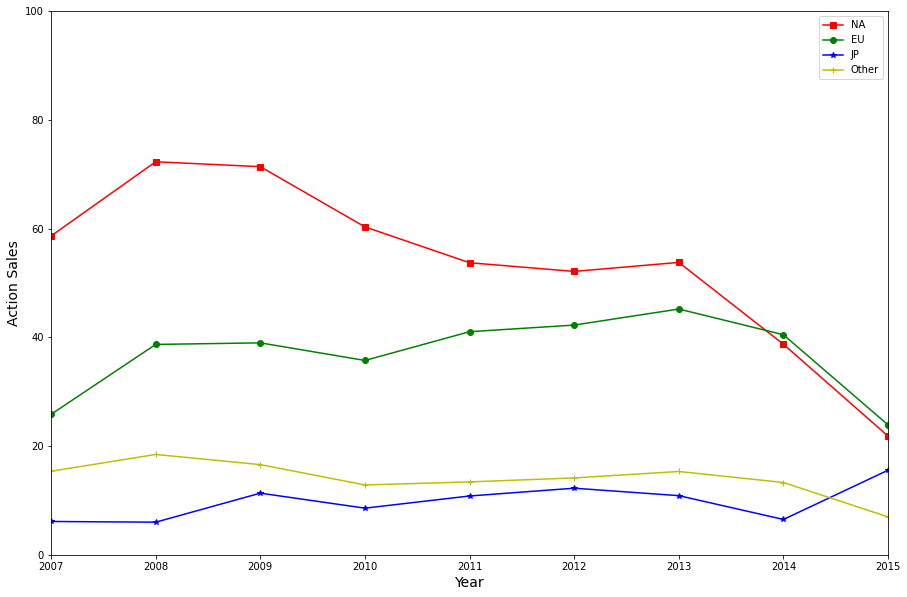

In [56]:
# 지역별 Action장르에 대한 판매량

F = game_new[game_new['Genre'] == 'Action']
F_NA = F.groupby('Year')['NA_Sales'].sum()
F_EU = F.groupby('Year')['EU_Sales'].sum()
F_JP = F.groupby('Year')['JP_Sales'].sum()
F_Other = F.groupby('Year')['Other_Sales'].sum()

plt.figure(figsize=(15,10))

plt.plot(F_NA, marker = 's', color = 'r')
plt.plot(F_EU, marker = 'o', color = 'g')
plt.plot(F_JP, marker = '*', color = 'b')
plt.plot(F_Other, marker = '+', color = 'y')

plt.xlabel('Year', fontsize = 14)
plt.ylabel('Action Sales', fontsize = 14)
plt.legend(['NA','EU','JP','Other'])
plt.xlim(2007, 2015)
plt.ylim(0, 100)
plt.show()

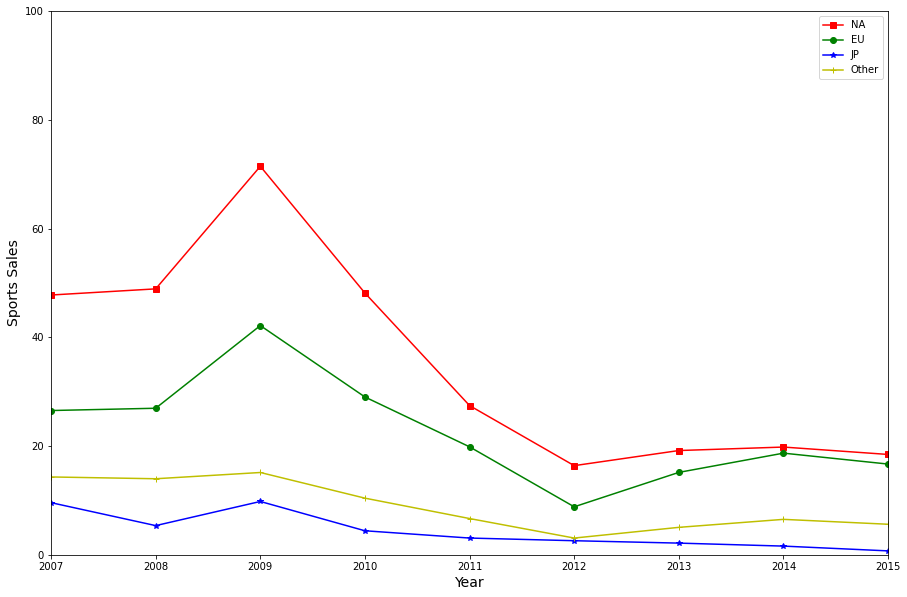

In [57]:
# 지역별 Sports장르에 대한 판매량

F = game_new[game_new['Genre'] == 'Sports']
F_NA = F.groupby('Year')['NA_Sales'].sum()
F_EU = F.groupby('Year')['EU_Sales'].sum()
F_JP = F.groupby('Year')['JP_Sales'].sum()
F_Other = F.groupby('Year')['Other_Sales'].sum()

plt.figure(figsize=(15,10))

plt.plot(F_NA, marker = 's', color = 'r')
plt.plot(F_EU, marker = 'o', color = 'g')
plt.plot(F_JP, marker = '*', color = 'b')
plt.plot(F_Other, marker = '+', color = 'y')

plt.xlabel('Year', fontsize = 14)
plt.ylabel('Sports Sales', fontsize = 14)
plt.legend(['NA','EU','JP','Other'])
plt.xlim(2007, 2015)
plt.ylim(0, 100)
plt.show()

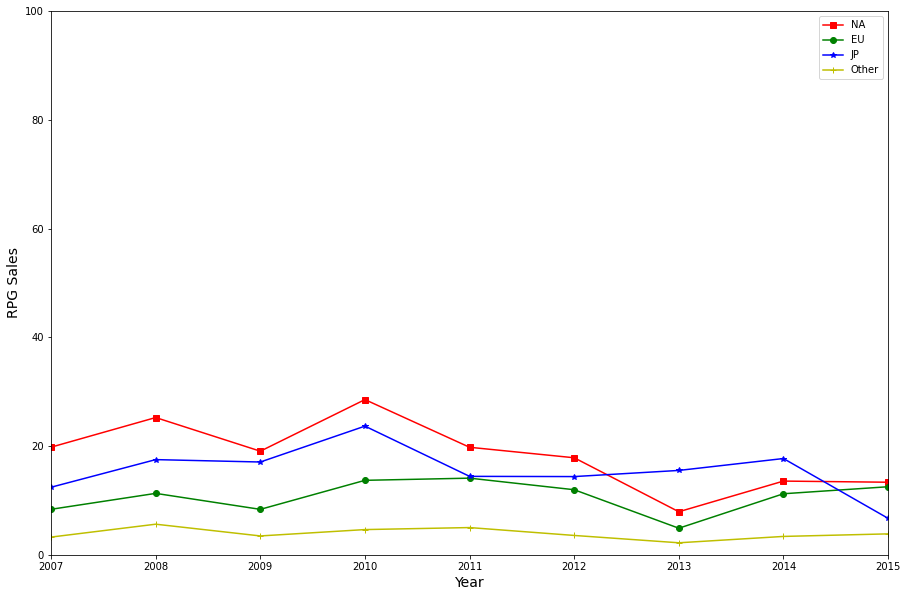

In [59]:
# 지역별 Role-Playing장르에 대한 판매량

F = game_new[game_new['Genre'] == 'Role-Playing']
F_NA = F.groupby('Year')['NA_Sales'].sum()
F_EU = F.groupby('Year')['EU_Sales'].sum()
F_JP = F.groupby('Year')['JP_Sales'].sum()
F_Other = F.groupby('Year')['Other_Sales'].sum()

plt.figure(figsize=(15,10))

plt.plot(F_NA, marker = 's', color = 'r')
plt.plot(F_EU, marker = 'o', color = 'g')
plt.plot(F_JP, marker = '*', color = 'b')
plt.plot(F_Other, marker = '+', color = 'y')

plt.xlabel('Year', fontsize = 14)
plt.ylabel('RPG Sales', fontsize = 14)
plt.legend(['NA','EU','JP','Other'])
plt.xlim(2007, 2015)
plt.ylim(0, 100)
plt.show()

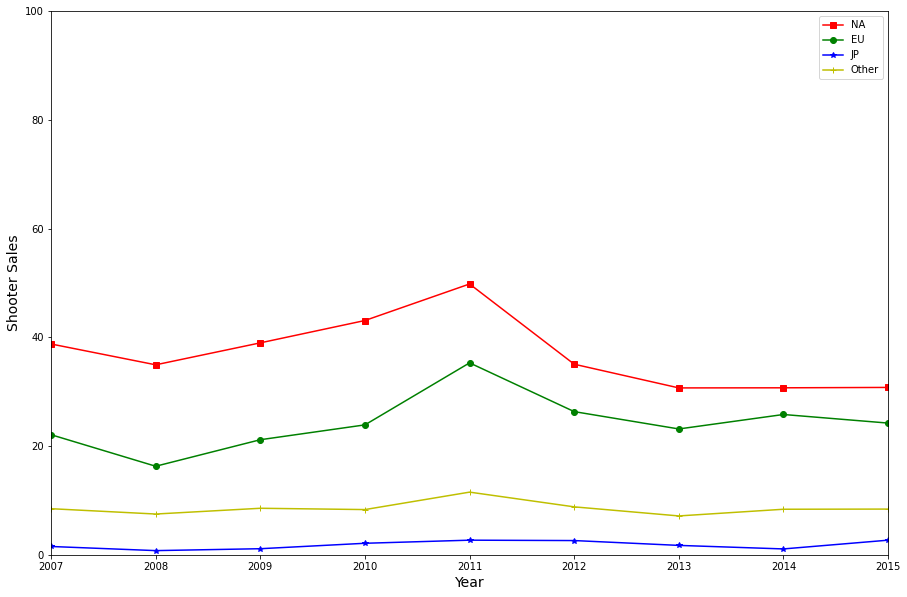

In [60]:
# 지역별 Shooter장르에 대한 판매량

F = game_new[game_new['Genre'] == 'Shooter']
F_NA = F.groupby('Year')['NA_Sales'].sum()
F_EU = F.groupby('Year')['EU_Sales'].sum()
F_JP = F.groupby('Year')['JP_Sales'].sum()
F_Other = F.groupby('Year')['Other_Sales'].sum()

plt.figure(figsize=(15,10))

plt.plot(F_NA, marker = 's', color = 'r')
plt.plot(F_EU, marker = 'o', color = 'g')
plt.plot(F_JP, marker = '*', color = 'b')
plt.plot(F_Other, marker = '+', color = 'y')

plt.xlabel('Year', fontsize = 14)
plt.ylabel('Shooter Sales', fontsize = 14)
plt.legend(['NA','EU','JP','Other'])
plt.xlim(2007, 2015)
plt.ylim(0, 100)
plt.show()

In [61]:
# 장르별 지역의 판매량 총합을 보여주는 표

Sales_game['Total_Sales'] = Sales_game['NA_Sales'] + Sales_game['EU_Sales'] + Sales_game['JP_Sales'] + Sales_game['Other_Sales']
Sales_game

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Genre,,,,,
Action,858.75,513.64,156.60,183.99,1712.98
Adventure,101.79,63.66,51.87,16.70,234.02
Fighting,220.35,99.90,87.14,36.15,443.54
Misc,394.73,208.15,104.18,72.64,779.70
Platform,445.38,200.63,130.53,51.45,827.99
Puzzle,121.58,50.47,56.24,12.44,240.73
Racing,354.70,235.02,56.32,76.51,722.55
Role-Playing,318.76,183.09,342.93,56.73,901.51
Shooter,574.48,310.23,38.18,101.86,1024.75


  - 기본적으로 인기의 척도는 Sales(출고량, 판매량)의 양이라고 잡았다. 왜냐하면 부분유료화(Free to Play)가 대부분인 대한민국의 경우는 단지 Sales(출고량). 즉, 얼마나 팔았냐 만으로는 인기의 척도가 될 수 없지만 플레이스테이션이나 엑스박스와 같은 콘솔게임인 경우 게임을 처음부터 구매해서 유료로 게임을 즐기기 때문에 게임의 판매량, 출고량(Sales)이 그 게임에 대한 기대치를 반영하고 그것은 인기의 척도라고 볼 수 있다.
  - Action 장르의 판매량 합이 압도적으로 많지만 다른 시각에서 본다면<br> Action 장르의 출시된 게임의 수량이 단지 많아서 판매량가 높아보일 수 있다고 생각.<br> 
모든 지역의 총 판매량 / 출시된 게임 수로 출시된 게임을 장르당 평균 판매량으로 계산해보았다.<br><br>
결과<br>
Action  -> 0.52<br>
Sports  -> 0.56<br>
Shooter -> 0.80<br>
RPG     -> 0.61<br>
Racing  -> 0.60<br>
즉, 출시된 게임을 장르 별로 나누어보았을때 Shooter 장르가 가장 평균 수익률이 좋다고 할 수 있음.

도출된 결과로 Shooter 장르를 출시했을 때 가장 호응이 좋은 곳은 북미 지역이므로 북미 지역을 기반으로 Shooter 장르로 출시할 것을 결정.<br>
하지만 유럽 지역의 게이머들 또한 Shooter장르에 대한 흥미가 높기 때문에 부가적인 수익 또한 예상할 수 있다.

그렇다면 어느 플렛폼을 기반으로 출시하는 것이 가장 최근 판매율이 높고 최신 트렌드일까?

In [62]:
year_platform_DS = "(Year >= 2007) and (Platform == 'DS')"
year_platform_PS2 = "(Year >= 2007) and (Platform == 'PS2')"
year_platform_PS3 = "(Year >= 2007) and (Platform == 'PS3')"
year_platform_PS4 = "(Year >= 2007) and (Platform == 'PS4')"
year_platform_wii = "(Year >= 2007) and (Platform == 'Wii')"
year_platform_x360 = "(Year >= 2007) and (Platform == 'X360')"
year_platform_PC = "(Year >= 2007) and (Platform == 'PC')"

year_plat_DS = game_new.query(year_platform_DS)
year_plat_PS2 = game_new.query(year_platform_PS2)
year_plat_PS3 = game_new.query(year_platform_PS3)
year_plat_PS4 = game_new.query(year_platform_PS4)
year_plat_wii = game_new.query(year_platform_wii)
year_plat_x360 = game_new.query(year_platform_x360)
year_plat_PC = game_new.query(year_platform_PC)

year_plat_DS.groupby("Platform")['Name'].count()
year_plat_PS2.groupby("Platform")['Name'].count()
year_plat_PS3.groupby("Platform")['Name'].count()
year_plat_PS4.groupby("Platform")['Name'].count()
year_plat_wii.groupby("Platform")['Name'].count()
year_plat_x360.groupby("Platform")['Name'].count()
year_plat_PC.groupby("Platform")['Name'].count()


platform_1_DS = year_plat_DS.groupby('Year')['Platform'].count()
platform_1_PS2 = year_plat_PS2.groupby('Year')['Platform'].count()
platform_1_PS3 = year_plat_PS3.groupby('Year')['Platform'].count()
platform_1_PS4 = year_plat_PS4.groupby('Year')['Platform'].count()
platform_1_wii = year_plat_wii.groupby('Year')['Platform'].count()
platform_1_x360 = year_plat_x360.groupby('Year')['Platform'].count()
platform_1_PC = year_plat_PC.groupby('Year')['Platform'].count()

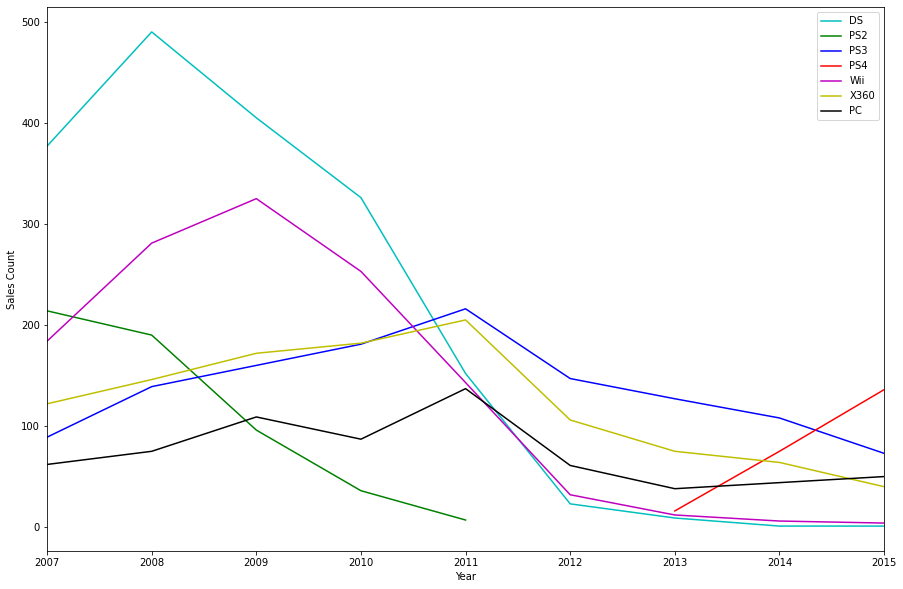

In [64]:
legend = ['DS', 'PS2', 'PS3', 'PS4', 'Wii', 'X360', 'PC']
plt.figure(figsize=(15,10))

plt.plot(platform_1_DS, color = 'c')
plt.plot(platform_1_PS2, color = 'g')
plt.plot(platform_1_PS3, color = 'b')
plt.plot(platform_1_PS4, color = 'r')
plt.plot(platform_1_wii, color = 'm')
plt.plot(platform_1_x360, color = 'y')
plt.plot(platform_1_PC, color = 'k')


plt.xlim(2007,2015)
plt.xlabel('Year')
plt.ylabel('Sales Count')
plt.legend(legend)
plt.show()

닌텐도DS 플렛폼은 2010년을 기준으로 그래프가 급격하게 꺾여 내려가는 것을 볼 수 있다. PS3 또한 PS4 최신 기종이 나오면서 PS3을 기반으로 하는 게임들이 줄었다. PS4와 PC는 계속해서 상승그래프를 그리고 있기 때문에 PS4와 PC가 최신 트렌드라고 할 수 있다.<br>
즉, 우리는 PS4와 PC가 크로스플렛폼이 가능하게 제작해야 한다.

# $Clustering$

군집화를 통해 기준을 북미, 유럽의 판매량으로 설정하고 총 판매량과의 상관관계를 파악해 성공한 게임들의 공통점을 살펴봄.

In [69]:
# 군집화를 진행하기 위한 새로운 작업 공간을 만듦.

game_old = game_new.copy()

In [70]:
game_old

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [71]:
# log값으로 변환하기 전에 value가 0인 값들은 모두 제거함.
# log를 취하는 이유는 정규성을 높이고 분석 시 정확한 값을 얻기 위해서이다.
# 편차가 큰 데이터일수록 log를 취해서 의미있는 결과를 도출해내야함.
# 0에 가까운 수일 수록 log를 취하면 기하급수적으로 음수값에 다가가기 때문에 변경하거나 제거해줘야함.

# 여기서는 0.0은 작은 소수점으로 표현된 것이 아닌 해당 지역에는 게임이 아예 출고되지 않았다는 zero(0)으로 생각하고 
# 데이터 분석 시 이상치 제거를 위해 완전 제거를 해줌.

# 필요가 없는 JP_Sales 와 Other_Sales Columns 또한 제거했다.

zero = game_old[game_old.NA_Sales == game_old.NA_Sales.min()]
game_old = game_old.drop(zero.index)

In [72]:
zero_1 = game_old[game_old.EU_Sales == game_old.EU_Sales.min()]
game_old = game_old.drop(zero_1.index)

In [73]:
game_old = game_old.drop(['JP_Sales', 'Other_Sales'], axis = 'columns')
game_old

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09
6,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,0.02,0.01
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,0.04,0.03
10,Ford Racing,PS,2001,Racing,Empire Interactive,0.48,0.33
11,Harvest Moon: More Friends of Mineral Town,GBA,2003,Simulation,Ubisoft,0.14,0.05
...,...,...,...,...,...,...,...
16588,MindJack,PS3,2011,Shooter,Square Enix,0.07,0.08
16591,Madden NFL 2005,PS2,2004,Sports,Electronic Arts,4.18,0.26
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19


In [74]:
game_old['Total_Sales'] = game_old['NA_Sales'] + game_old['EU_Sales']

In [75]:
game_old.head(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,Total_Sales
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.21
6,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,0.02,0.01,0.03
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,0.04,0.03,0.07
10,Ford Racing,PS,2001,Racing,Empire Interactive,0.48,0.33,0.81
11,Harvest Moon: More Friends of Mineral Town,GBA,2003,Simulation,Ubisoft,0.14,0.05,0.19


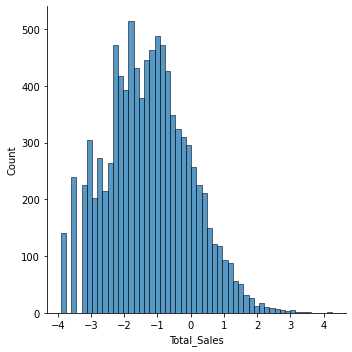

In [76]:
# 북미 판매량, 유럽 판매량, 총 판매량을 각각 로그 값을 취해 --_log에 저장.

Total_log = np.log(game_old['Total_Sales'])

# 로그 스케일은 상대적인 비율을 뜻하므로 각각이 기준 0으로부터 2배 1.5배 증가하거나 감소한 값이다 라는 것을 의미한다.
sns.displot(Total_log)

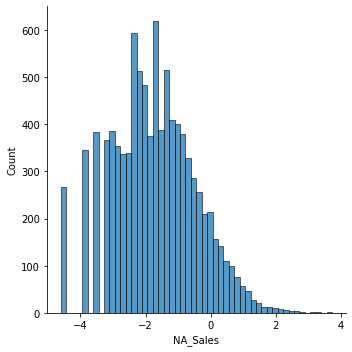

In [77]:
NA_log = np.log(game_old['NA_Sales'])

sns.displot(NA_log)

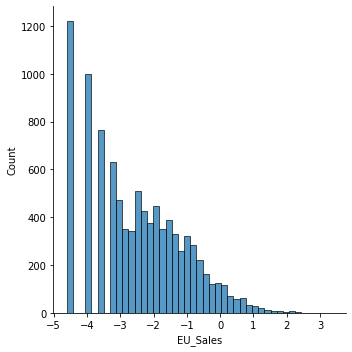

In [78]:
EU_log = np.log(game_old['EU_Sales'])

sns.displot(EU_log)

In [79]:
game_log = pd.concat([NA_log, EU_log, Total_log], axis = 1)

In [80]:
# 로그변환을 마친 지역별 판매량과 총 판매량을 보여주는 표

game_log

,NA_Sales,EU_Sales,Total_Sales
4,-2.120264,-2.407946,-1.560648
6,-3.912023,-4.605170,-3.506558
9,-3.218876,-3.506558,-2.659260
10,-0.733969,-1.108663,-0.210721
11,-1.966113,-2.995732,-1.660731
...,...,...,...
16588,-2.659260,-2.525729,-1.897120
16591,1.430311,-1.347074,1.490654
16593,-1.897120,-3.218876,-1.660731
16595,-0.820981,-1.660731,-0.462035


# 몇개의 군집으로 나누는 것이 좋을까?

In [81]:
scaler = StandardScaler()
game_scaled = scaler.fit_transform(game_log)

In [82]:
print('mean: ', game_scaled.mean(axis=0).round(2))
print('std: ', game_scaled.std(axis=0).round(2))

mean:  [-0.  0. -0.]
std:  [1. 1. 1.]


In [83]:
sse = {}

for k in range(1,10):
  kmeans = KMeans(n_clusters=k, random_state=1)
  kmeans.fit(game_scaled)
  sse[k] = kmeans.inertia_

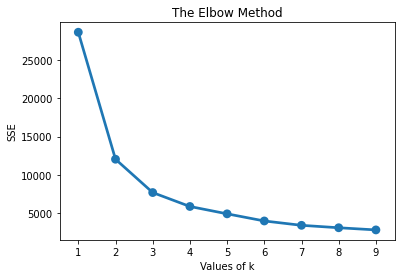

In [84]:
# 결과 시각화

# 엘보우 메소드는 군집수에 따라 군집내 제곱합을 플롯팅하여 일반적으로 적절한 군집 수으로 선택하는 방법입니다. 
# 엘보우 메소드를 통해 최적의 군집 수가 3인 것을 알게 되었다.

plt.title('The Elbow Method')
plt.xlabel('Values of k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

# 북미, 유럽 판매량에 따른 전체 판매량의 상관관계



In [85]:
# 최종 모델 학습
kmeans = KMeans(n_clusters=3, max_iter=50, random_state=42)
kmeans.fit(game_scaled)

# 고객별 클러스터 지정
cluster_labels = kmeans.labels_

game_k3 = game_old.assign(Cluster = cluster_labels)

In [ ]:
game_k3.head(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,Total_Sales,Cluster
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.21,2
6,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,0.02,0.01,0.03,1
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,0.04,0.03,0.07,1
10,Ford Racing,PS,2001,Racing,Empire Interactive,0.48,0.33,0.81,0
11,Harvest Moon: More Friends of Mineral Town,GBA,2003,Simulation,Ubisoft,0.14,0.05,0.19,2


In [86]:
game_k3.groupby(['Cluster']).agg({
    'NA_Sales': 'mean',
    'EU_Sales': 'mean',
    'Total_Sales': ['mean','count']
}).round(4)

NA_Sales EU_Sales Total_Sales      
            mean     mean        mean count
Cluster                                    
0         1.3191   0.8090      2.1281  2108
1         0.0611   0.0275      0.0886  3276
2         0.2478   0.1237      0.3715  4159

Cluster 0: 게임들의 전체 판매량의 평균과 북미와 유럽 모두에서 판매량의 평균이 높다. 특히 북미가 높다.<br>
Cluster 1: 북미와 유럽 모두 낮은 성적을 내고 전체 판매량의 평균도 낮은 성적을 낸다.<br>
Cluster 2: 북미, 유럽, 전체 판매량에서 모두 중간 정도의 성적을 낸다.
<br><br>

모든 Cluster의 공통점은 북미의 평균이 더 높다는 것이다.

# 이로써 우리는 당연하게 Cluster 0에 가까운 game들을 개발해야 한다는 것을 알 수 있다. Cluster 0에 포함되는 게임은 어떤 것들이 있을까

In [95]:
# Cluster 0에 포함되는 게임들의 샘플

game_k3_c = game_k3[game_k3['Cluster'] == 0]
game_k3_c.sample(20)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,Total_Sales,Cluster
2028,Luigi's Mansion: Dark Moon,3DS,2013,Action,Nintendo,1.78,1.39,3.17,0
456,FIFA 14,XOne,2013,Sports,Electronic Arts,0.41,0.66,1.07,0
11175,Dead Rising 2,PS3,2010,Action,Capcom,0.43,0.57,1.00,0
2389,Call of Duty: Modern Warfare: Reflex Edition,Wii,2009,Shooter,Activision,0.95,0.43,1.38,0
7616,Medal of Honor,PS3,2010,Shooter,Electronic Arts,1.28,1.05,2.33,0
14142,High School Musical 3: Senior Year,DS,2008,Misc,Disney Interactive Studios,0.64,0.76,1.40,0
4992,Call of Duty: Modern Warfare 3,Wii,2011,Shooter,Activision,0.60,0.21,0.81,0
13822,Ford Racing 2,PS2,2003,Racing,Empire Interactive,0.49,0.38,0.87,0
13229,Brain Age: Train Your Brain in Minutes a Day,DS,2005,Misc,Nintendo,4.75,9.26,14.01,0
5189,Madden NFL 06,PS2,2005,Sports,Electronic Arts,3.98,0.26,4.24,0


In [96]:
# Cluster 0에 들어가는 장르별 게임 수

game_k3_c.groupby('Genre')['Name'].count()

Genre
Action          475
Adventure        44
Fighting        126
Misc            167
Platform        192
Puzzle           50
Racing          199
Role-Playing    153
Shooter         279
Simulation       87
Sports          310
Strategy         26
Name: Name, dtype: int64

# 1위가 Action, 2위가 Sports, 3위가 Shooter장르이다. 하지만 앞서 설명했듯 Action장르와 Sports장르는 최근 판매율이 부진하므로 Shooter장르가 적절하다고 생각한다.

# 최종 결과

  - 지금까지 다음 분기에 개발할 게임을 데이터를 분석해 정해보았고 검증까지 진행하였다. 그 결과 북미지역에 Shooter 게임을 PS4나 PC 크로스플렛폼 기반으로 출시하는 것이 가장 높은 수익을 거둘 것으로 예상하는 것은 타당하다는 결론이 도출되었고, 그에 맞춰 개발을 진행하면 될 것이다.
  - 시각화를 통해 가장 꼼꼼하게 살펴본 것은 최근 장르별 판매량 차트이다. 어느 장르가 어느 지역에서 최신 트렌드로 각광받고 있는지 확인하기 위해서다. 기본적으로 기업은 이윤을 추구한다. 이윤이란, 총 수입에서 내가 투자한 비용을 제 한 수익으로 대부분 "손익분기점"이라는 단어로 수익성을 들어 보았을 것이다. 물론 게임에 투자한 비용은 게임마다, 장르마다, 연도의 트렌드마다 다르겠지만 출고량, 판매량이 높다는 것은 그 게임에 대한 기대와 흥미가 높다는 것을 뜻하고 해당 회사에 대한 주가 PER이 증가하여 장기적으로 보았을 때도 이 회사의 차기작의 수익성에 큰 기대를 걸 수 있게 된다.

# 추가분석

  - 위에서 인기의 척도를 정의했다.회사의 자체개발이 아닌 이미 시장에 나와 다른 시리즈들로 인기와 기대치의 기반을 잡은 게임들의 후속작들이 판매량이 높다는 것을 파악(ex : GTA, 포켓몬, 심즈, 스트리트파이터, 디즈니, 레고 등)
  - Shooter장르의 대표회사인 엑티비전블리자드, EA 등과 협업하여 게임에 들어가는 리소스를 같이 개발해나가는 방향으로 진행되어야 할 것이다.
  - 게임기업의 수익은 개발비용이 얼마나 들어서 얼마의 수입을 냈냐에 따라서 게임의 성적을 평가한다. 절반 정도가 인건비로 개발비용이 사용되지만 정확한 데이터를 위해 출시된 게임들의 총 개발비용을 찾아보았다. 로스트아크 약 1000억원, 리니지2 약 500억원, GTA5 약 3200억원, 배틀필드4 약 1180억원, 파이널판타지 14 약 1000억원, 위쳐3 약 500억원, 배틀그라운드 약 40억원, 콜오브듀티:모던워페어2가 약 3290억원으로 1등을 차지했다. 평균적으로 Action장르나 RPG장르가 평균적으로 개발비용이 많이 들지만 Shooter장르도 특정 게임에서 높은 개발비용을 보이고 있다.

# 2023년의 시점으로 보았을 때 결과분석

  - 우리는 이미 결과를 알고 있다. 콘솔시장에서는 역시 플레이스테이션4가 전체 콘솔게임의 판매량 중 55%를 차지하였다. 대표적인 플레이스테이션4의 2016년 출시 게임으로는 다크소울3, 언챠티드4, 파이널 판타지15, 문명6, 콜오브듀티:인피니트 워페어, 디스아너드2 등이 있다. 대부분 Action, RPG, Adventure 장르의 대작이다. 하지만 Shooter 장르에서 역사에 남을 게임이 등장했다. 시리즈들로 인기와 기대치의 기반을 잡은 게임들의 후속작들이 판매량이 높다는 것을 파악했고, Shooter장르의 대표회사인 엑티비전블리자드, EA와 협업하여야 한다는 결론을 도출했으며, 플레이스테이션4와 PC 크로스플렛폼이 가능하게 설계해야한다고 분석했었다. 이 3가지 조건을 만족하는 게임으로 오버워치1이 등장하면서 전 세계를 휩쓸며 세계 게임시장의 부동의 1위 League of Legend(속칭 LOL,롤)을 2위로 끌어내렸다.<br><br>

결과론적으로 보았을 때, 데이터 분석을 잘 되었다고 생각한다.<br>
감사합니다.